# Homework #2: Error analysis of the quadratic formula solution
## Function definition
first we define our function based on a given/random a,b,c values and graph it 
We'll have:

$ax^2 + bx + c = 0$


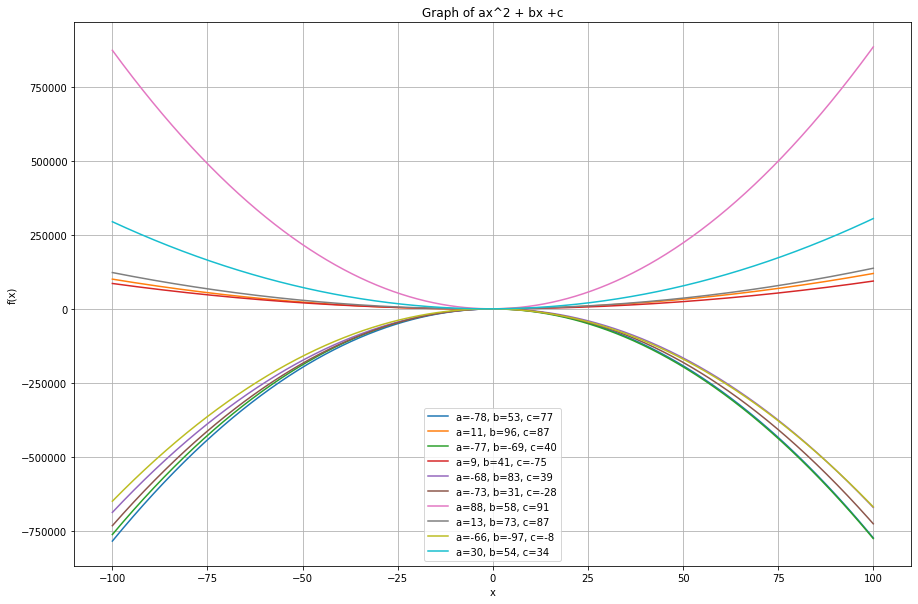

<function matplotlib.pyplot.show(*args, **kw)>

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

def f(x,a,b,c):
    f = (a*x**2)+(b*x)+c
    return f

plt.figure (figsize=(15,10))
x = np.arange(-100, 100, 0.01)
for i in range(10):
    a= random.randint(-100,100)
    b= random.randint(-100,100)
    c= random.randint(-100,100)
    y = f(x,a,b,c) #Change a, b, c here 
    plt.plot(x,y,label = "a=" +str(a)+", b=" +str(b)+", c="+str(c))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Graph of ax^2 + bx +c")
plt.legend()
plt.grid()
plt.show()
plt.show


## Function for a= 1 , b=1 , c = 10^-n where n= 1,2,3,4...
we loop the function and graph for the given a, b, and c values

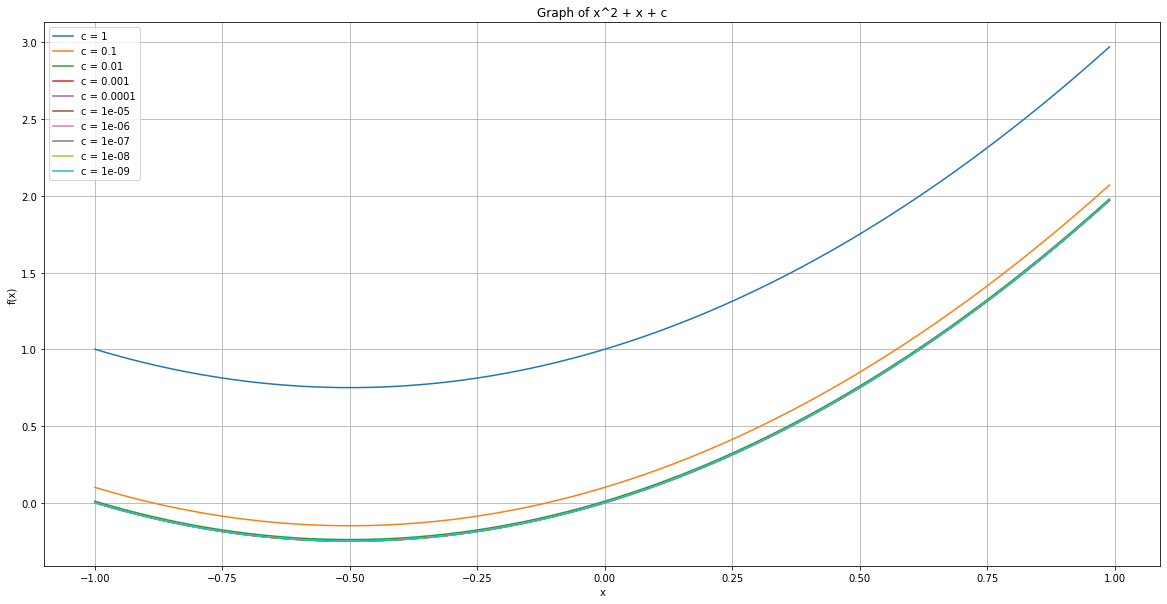

<function matplotlib.pyplot.show(*args, **kw)>

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math


def f(x,a,b,c):
    f = (a*x**2)+(b*x)+c
    return f
plt.figure(figsize=(20,10))
x = np.arange(-1, 1, 0.01)
for n in range(10):

    c = 10**(-n)
    y = f(x,1,1,c)
    plt.plot(x,y,label = 'c = '+str(c))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Graph of x^2 + x + c")

plt.legend()
plt.grid()
plt.show()
plt.show

## Define a function to find the solutions
prompt: "a. Write a program that calculates all four solutions for arbitrary values of a, b, and c."
**x3 and x4 in the function give us more accurate values and will be assumed as the correct value of the root, this is because we go around the subtraction error by adding the b^2-4ac term to b rather than subtracting**
The solutions to a quadratic polynomial can be written in the two forms:

1) $x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

2) $x_{3,4} = \frac{-2c}{b \pm \sqrt{b^2 - 4ac}}$



In [48]:
def solution(a,b,c):
    x1= (-b + np.sqrt(b**2-4*a*c))/(2*a)
    x2= (-b - np.sqrt(b**2-4*a*c))/(2*a)
    
    x3= (-2*c)/(b+np.sqrt(b**2-4*a*c))
    x4= (-2*c)/(b-np.sqrt(b**2-4*a*c))
    return x1 ,x2 ,x3, x4



The Solution Function is function which takes on the parameter of a, b, and c and finds the 4 solutions, two based on one definition of solving a quadratic and the other 2 from the other definition.

## Error analysis as c decreases
Prompt: "b) Investigate how errors in your computed answers become large as the subtractive
cancellation increases and relate this to the known machine precision. (Hint: A good test case employs a = 1, b = 1, c = 10−n, n = 1,2,3,....)

In [80]:
x1list=[]
x2list=[]
x3list=[]
x4list=[]
clist =[]
for n in range(16):
    c = 10**(-n-1)
    x1,x2,x3,x4 = solution(1,1,c)
    x1list.append(x1)
    x2list.append(x2)
    x3list.append(x3)
    x4list.append(x4)
    clist.append(c)

    print ("c=",c)
    print ("x1= %.31f, x2=%.31f"%(x1,x2) + "\n" + "x3= %.31f, x4=%.31f"%(x3,x4))
    print ('\n')

c= 0.1
x1= -0.1127016653792582978610425925581, x2=-0.8872983346207417021389574074419
x3= -0.1127016653792583117388304003725, x4=-0.8872983346207418131612598699576


c= 0.01
x1= -0.0101020514433644015284130546206, x2=-0.9898979485566355984715869453794
x3= -0.0101020514433643807117313428989, x4=-0.9898979485566336000701426200976


c= 0.001
x1= -0.0010010020050140178149433722865, x2=-0.9989989979949860376962078589713
x3= -0.0010010020050140421010720359618, x4=-0.9989989979950102405581446873839


c= 0.0001
x1= -0.0001000100020004945911011873250, x2=-0.9998999899979994498977475814172
x3= -0.0001000100020005001476373213132, x4=-0.9998999899980550720712813017599


c= 1e-05
x1= -0.0000100001000020166763704310142, x2=-0.9999899998999979278124783377280
x3= -0.0000100001000020000508077423068, x4=-0.9999899998983354798554046283243


c= 1e-06
x1= -0.0000010000010000066339443947072, x2=-0.9999989999989999933660556052928
x3= -0.0000010000010000020000388985158, x4=-0.9999989999943660334835726644087




### Analysis
As we can see, the computer computes the values until c=e-16 which is expected due to the machine percision 

To compare with the analytical solution, we first have to find the analytical solutions, but in doing so, since the determinant is a decimal and the square root of the determinant will also be a approximation, we find the solution using the binomial expansion for the determinant using:

$$(1+x)^{\alpha} \approx 1 + \alpha x$$

The following code will create a list with the analytical approximations using the said binomial approx. for the determinant
$(1 - 4*c)^{1/2} \approx 1 - 2*c $

In [50]:
binomiallist=[]
for i in range(16):
    c = 10**(-i-1)
    a = (1-2*10**(-i-1))
    binomiallist.append(a)
    print("for c=",c," the approximated binomial distribution for the determinant is: ",a)

for c= 0.1  the approximated binomial distribution for the determinant is:  0.8
for c= 0.01  the approximated binomial distribution for the determinant is:  0.98
for c= 0.001  the approximated binomial distribution for the determinant is:  0.998
for c= 0.0001  the approximated binomial distribution for the determinant is:  0.9998
for c= 1e-05  the approximated binomial distribution for the determinant is:  0.99998
for c= 1e-06  the approximated binomial distribution for the determinant is:  0.999998
for c= 1e-07  the approximated binomial distribution for the determinant is:  0.9999998
for c= 1e-08  the approximated binomial distribution for the determinant is:  0.99999998
for c= 1e-09  the approximated binomial distribution for the determinant is:  0.999999998
for c= 1e-10  the approximated binomial distribution for the determinant is:  0.9999999998
for c= 1e-11  the approximated binomial distribution for the determinant is:  0.99999999998
for c= 1e-12  the approximated binomial distr

Since we want to get rid of our subtraction cancelation error, for our analytical solution we will use one solution from each one of our methods of calculating the root. We choose each respective root so the -b-b and b+b is approximated. In terms of our code, that would be root x2 and x3 for reference to which (+) or (-) used. Therefore, the analytical solutions are:

In [72]:
root1list =[]
root2list =[]
for i in range(len(binomiallist)):
    analytical_root_1 =(-2*clist[i])/(1+ binomiallist[i])
    analytical_root_2 = (-1 - binomiallist[i])/(2) 
    print("For c= ",clist[i])
    print("The approximation analytical roots are: ", analytical_root_1," & ", analytical_root_2,"\n")
    root1list.append(analytical_root_1)
    root2list.append(analytical_root_2)

For c=  0.1
The approximation analytical roots are:  -0.11111111111111112  &  -0.9 

For c=  0.01
The approximation analytical roots are:  -0.010101010101010102  &  -0.99 

For c=  0.001
The approximation analytical roots are:  -0.001001001001001001  &  -0.999 

For c=  0.0001
The approximation analytical roots are:  -0.00010001000100010001  &  -0.9999 

For c=  1e-05
The approximation analytical roots are:  -1.0000100001000012e-05  &  -0.9999899999999999 

For c=  1e-06
The approximation analytical roots are:  -1.000001000001e-06  &  -0.9999990000000001 

For c=  1e-07
The approximation analytical roots are:  -1.00000010000001e-07  &  -0.9999998999999999 

For c=  1e-08
The approximation analytical roots are:  -1.00000001e-08  &  -0.9999999900000001 

For c=  1e-09
The approximation analytical roots are:  -1.0000000010000002e-09  &  -0.9999999989999999 

For c=  1e-10
The approximation analytical roots are:  -1.0000000001000001e-10  &  -0.9999999999 

For c=  1e-11
The approximation a

## Error Analysis
We will find the absoulute error of each equation based the root which contains the subraction cancelation error which are roots x1 and x4

In [97]:
errorequation1list=[]
errorequation2list=[]
for i in range(len(clist)):
    errorequation1 =  abs((x1list[i] - root1list[i])) 
                      
    errorequation2 =  abs((x4list[i] - root2list[i]))
        
    errorequation1list.append(errorequation1)
    errorequation2list.append(errorequation2)

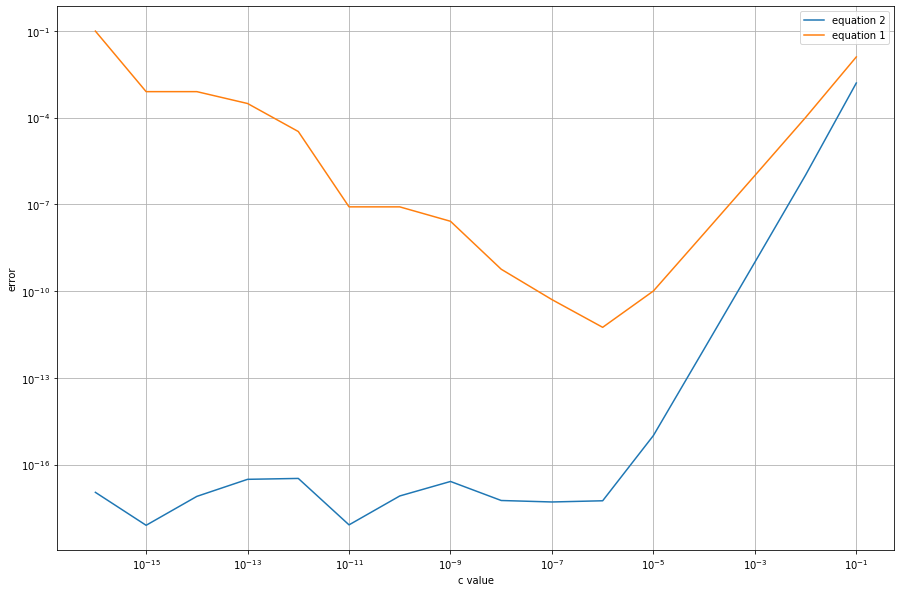

In [98]:
plt.figure(figsize=(15,10))
plt.plot(clist,errorequation1list, label="equation 2")
plt.plot(clist,errorequation2list, label="equation 1")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('c value')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.show()



## Program Extension
Prompt: "c. Extend your program so that it indicates the most precise solutions."

because we experience the error as b^2 >>4ac, we will incorporate an "if clause" from the graph above, to see as the c < 10^(-6)

In [99]:
def solution1(a,b,c):
    x1= (-b + np.sqrt(b**2-4*a*c))/(2*a)
    x2= (-b - np.sqrt(b**2-4*a*c))/(2*a)
    
    x3= (-2*c)/(b+np.sqrt(b**2-4*a*c))
    x4= (-2*c)/(b-np.sqrt(b**2-4*a*c))
    
    if c<10**-6:
        return x3,x2 #these dont contain the cancelation error
    else:
        return x3,x4 # the second equation has less error in general compared to the first equation 



In [104]:
clist =[]
for n in range(20):
    c = 10**(-n-1)
    firstx,secondx= solution1(1,1,c)
    
    
    
    
    clist.append(c)
    print ("c=",c)
    print ("x1= %.31f, x2=%.31f"%(firstx,secondx))
    print ('\n')

c= 0.1
x1= -0.1127016653792583117388304003725, x2=-0.8872983346207418131612598699576


c= 0.01
x1= -0.0101020514433643807117313428989, x2=-0.9898979485566336000701426200976


c= 0.001
x1= -0.0010010020050140421010720359618, x2=-0.9989989979950102405581446873839


c= 0.0001
x1= -0.0001000100020005001476373213132, x2=-0.9998999899980550720712813017599


c= 1e-05
x1= -0.0000100001000020000508077423068, x2=-0.9999899998983354798554046283243


c= 1e-06
x1= -0.0000010000010000020000388985158, x2=-0.9999989999943660334835726644087


c= 1e-07
x1= -0.0000001000000100000020037483288, x2=-0.9999998999999899496060606907122


c= 1e-08
x1= -0.0000000100000001000000035498252, x2=-0.9999999899999998387301047841902


c= 1e-09
x1= -0.0000000010000000010000002114929, x2=-0.9999999989999999172596290009096


c= 1e-10
x1= -0.0000000001000000000100000097882, x2=-0.9999999998999999917259629000910


c= 1e-11
x1= -0.0000000000100000000000999993918, x2=-0.9999999999899999991725962900091


c= 1e-12
x1= -0.0000000

/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
